In [1]:
import os
import gym
import imageio
import pybullet_envs
import PIL.Image
import pybullet
import pybullet_data

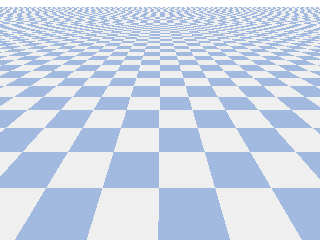

In [4]:
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.networks import actor_distribution_network
from tf_agents.replay_buffers import tf_uniform_replay_buffer
env = gym.make('HumanoidBulletEnv-v0')
# env.render(mode='human')
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))



In [ ]:
done = False
video_filename = 'humanoid_gym.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
    while not done:
        state, reward, done, info = env.step(env.action_space.sample())
        video.append_data(env.render(mode='rgb_array'))
env.reset()

In [2]:
# Pybullet testing environment
import PIL.Image
import os
# Important: pybullet should be charged only once !!
from tf_agents.environments import suite_pybullet, parallel_py_environment
from tf_agents.environments import tf_py_environment
from tf_agents.trajectories.trajectory import Trajectory
from tf_agents.networks import actor_distribution_network
from tf_agents.drivers import dynamic_episode_driver, dynamic_step_driver
from tf_agents.policies import random_tf_policy
import tensorflow as tf

/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


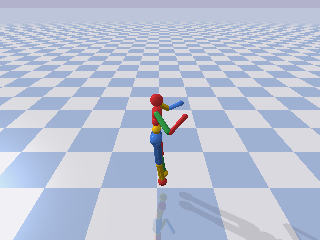

In [5]:
py_env = suite_pybullet.load('HumanoidBulletEnv-v0')
py_env.render(mode='human')
py_env.reset()
PIL.Image.fromarray(py_env.render())

In [13]:
bad_state_detection = lambda trajectory: print("bad state!: {}".format(trajectory.observation[0][0] + 0.8))\
    if trajectory.observation[0][0] + 0.8 <= 0.78 else None
tf_env = tf_py_environment.TFPyEnvironment(py_env)
stochastic_policy_dir = os.path.join('saves/', 'stochastic_policy')
policy = tf.compat.v2.saved_model.load(stochastic_policy_dir) if os.path.exists(stochastic_policy_dir)\
    else random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
dynamic_episode_driver.DynamicEpisodeDriver(tf_env, policy, num_episodes=10, observers=[bad_state_detection]).run()



bad state!: 0.7454018592834473
bad state!: 0.7662191987037659
bad state!: 0.7715442180633545
bad state!: 0.7671445608139038
bad state!: 0.7525526285171509
bad state!: 0.7654160857200623
bad state!: 0.7690536975860596
bad state!: 0.7606465816497803


(TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: shape=(1, 44), dtype=float32, numpy=
 array([[ 5.9999996e-01, -1.8499912e-05,  1.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
         -1.1636870e-01,  0.0000000e+00,  4.9668360e-01,  0.0000000e+00,
          9.6052580e-02,  0.0000000e+00,  9.4654322e-01,  0.0000000e+00,
          2.4557100e-01,  0.0000000e+00,  7.6876855e-01,  0.0000000e+00,
          1.0370921e+00,  0.0000000e+00,  6.8557453e-01,  0.0000000e+00,
          2.8255874e-01,  0.0000000e+00,  7.4347776e-01,  0.0000000e+00,
          9.7353679e-01,  0.0000000e+00,  1.7192774e-01,  0.0000000e+00,
          1.4834829e-01,  0.0000000e+00,  2.4413362e-01,  0.0000000e+00,
         -1.3309951e-01,  0.0

In [3]:
# Parallel environments.
num_parallel_environments = 4
tf_env = tf_py_environment.TFPyEnvironment(parallel_py_environment.ParallelPyEnvironment(
    [lambda : suite_pybullet.load('HumanoidBulletEnv-v0')] * num_parallel_environments))
tf_env.reset()

/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(col

TimeStep(step_type=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>, reward=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, discount=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, observation=<tf.Tensor: shape=(4, 44), dtype=float32, numpy=
array([[ 5.99999964e-01,  1.20099403e-05,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -4.57614809e-02,
         0.00000000e+00,  4.54744905e-01,  0.00000000e+00,
        -8.83979723e-02,  0.00000000e+00,  5.76709747e-01,
         0.00000000e+00,  2.50902146e-01,  0.00000000e+00,
         6.78732574e-01,  0.00000000e+00,  9.82095599e-01,
         0.00000000e+00,  8.26527059e-01,  0.00000000e+00,
         2.71847099e-01,  0.00000000e+00,  7.84860551e-01,
         0.00000000e+00,  9.64644670e-01,  0.00000000e+00,
         2.15562448e-01,  0.00000000e+00,  2.18756169e-01,
     

In [4]:
replay_buffer_size = 12800

# create a dataset
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
actor_net = actor_distribution_network.ActorDistributionNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=(128, 128))
policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
train_step_counter = tf.compat.v2.Variable(0)

agent = reinforce_agent.ReinforceAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    actor_network=actor_net,
    optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4),
    normalize_returns=True,
    train_step_counter=train_step_counter)
agent.initialize()

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=replay_buffer_size)
dataset = replay_buffer.as_dataset(num_parallel_calls=3, sample_batch_size=replay_buffer_size, num_steps=3)

random_policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
dynamic_step_driver.DynamicStepDriver(tf_env, random_policy,
                                      observers=[replay_buffer.add_batch], num_steps=replay_buffer_size).run()


(TimeStep(step_type=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 1, 1, 1], dtype=int32)>, reward=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.5519533 , -2.5338988 , -3.9116447 , -0.98898846], dtype=float32)>, discount=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, observation=<tf.Tensor: shape=(4, 44), dtype=float32, numpy=
 array([[ 1.47847518e-01,  7.80455589e-01,  6.25211239e-01,
          4.87345494e-02,  1.70939803e-01, -6.62003338e-01,
         -3.28824520e-01,  6.72015667e-01, -1.11880071e-01,
         -3.79288971e-01, -9.46213782e-01,  6.35600805e-01,
          3.19654882e-01,  2.37792313e-01,  7.26553977e-01,
         -2.16587439e-01,  8.93150389e-01, -7.05732226e-01,
         -7.39869297e-01, -1.48600772e-01, -9.63215172e-01,
          3.82143795e-01, -9.61789072e-01,  1.27987668e-01,
          9.50943455e-02,  4.40279126e-01,  1.03907645e+00,
          1.11022304e-17, -7.51534164e-01, -5.50601482e-01,
          7.03761

In [5]:
def labeling_function(states):
    return states[:, :, 0] + 0.8 <= 0.78

In [6]:
import h5py
import tf_agents.trajectories.time_step as ts

dataset_path = 'dataset'
iterator = iter(dataset)

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
with h5py.File(dataset_path + '/rl_exploration.hdf5', 'w') as h5f:
    data = iterator.next()[0]
    h5f['state'] = data.observation[:, :2, :].numpy()
    h5f['action'] = data.action[:, :2, :].numpy()
    h5f['reward'] = data.reward[:, :2].numpy()
    h5f['next_state'] = data.observation[:, 1:, :].numpy()
    h5f['next_state_label'] = labeling_function(h5f['next_state'])
    # 0: initial state; 1: mid state; 2: terminal state
    h5f['state_type'] = data.step_type.numpy()
    h5f['next_state_type'] = data.next_step_type.numpy()

In [7]:
class generator:
    def __init__(self, file):
        self.file = file

    def __call__(self):
        with h5py.File(self.file, 'r') as hf:
            for (state, action, reward, next_state, label, state_type, next_state_type) in \
                zip(hf['state'], hf['action'], hf['reward'], hf['next_state'],
                    hf['next_state_label'], hf['state_type'], hf['next_state_type']):
                yield state, action, reward, next_state, label, state_type, next_state_type

    def get_tensor_shape(self):
        with h5py.File(self.file, 'r') as hf:
           return (tf.TensorShape(hf['state'].shape[1:]),
                   tf.TensorShape(hf['action'].shape[1:]),
                   tf.TensorShape(hf['reward'].shape[1:]),
                   tf.TensorShape(hf['next_state'].shape[1:]),
                   tf.TensorShape(hf['next_state_label'].shape[1:]),
                   tf.TensorShape(hf['state_type'].shape[1:]),
                   tf.TensorShape(hf['next_state_type'].shape[1:]))

gen = generator(dataset_path + '/rl_exploration.hdf5')
loaded_dataset = tf.data.Dataset.from_generator(gen,
                                                (tf.float32, tf.float32, tf.float32, tf.float32, tf.bool, tf.int8, tf.int8),
                                                gen.get_tensor_shape())

In [11]:
for state, action, reward, next_state, label, state_type, next_state_type in loaded_dataset:
    if label[0]:
        print(label[0], next_state[0], next_state_type)
    if label[1]:
        print(label[1], next_state[1], next_state_type)
    if state_type[0] == ts.StepType.LAST:
        print("BAD STATE S0:", state[0])
    if state_type[1] == ts.StepType.LAST:
        print("BAD STATE S0:", state[1])


BAD STATE S0: tf.Tensor(
[-5.2347295e-02  4.7557095e-01  8.7967736e-01 -4.1142195e-02
 -5.1877812e-02 -1.3349621e+00 -1.8114306e-01  4.1654825e-01
  7.8488857e-01  4.9467394e-01  6.3021702e-01 -6.7899013e-01
  1.0063015e+00 -2.3329474e-02 -5.7567483e-01  4.9030468e-01
 -3.7796548e-01 -5.0953460e-01  9.1448045e-01  1.6098998e+00
  3.8084775e-01  1.8182596e+00  1.5322676e-01 -3.8585737e-01
 -1.0032088e+00  1.5762649e-02 -1.0835222e+00 -1.2774393e-03
 -1.0016385e+00  1.3707857e-02 -1.1308223e-01 -4.0016299e-01
  3.0991825e-01  2.5196478e-02 -2.0791283e-01 -1.7100177e+00
  1.3396256e-01  3.2420942e-01  7.4681568e-01  1.9548235e-02
 -7.3090076e-01 -1.4850740e+00  0.0000000e+00  0.0000000e+00], shape=(44,), dtype=float32)
tf.Tensor(True, shape=(), dtype=bool) tf.Tensor(
[-0.03253866  0.24725276  0.96895105  0.06233391  0.3910157  -0.61074835
 -0.29489157  0.05866503  1.0962411   0.         -0.2829866   0.50299925
 -0.6362347   0.8374957  -0.512143    1.123581   -0.78303146 -2.4691656
  0.517

In [69]:
data.next_step_type

<tf.Tensor: shape=(12800, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 2],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [72]:
ts.StepType.FIRST # initial state
ts.StepType.LAST # terminal state
ts.StepType.MID # normal state

array(2, dtype=int32)